In [2]:
#importing libraries
import pandas as pd
import numpy as np
import os 
import math
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil.relativedelta import relativedelta

In [3]:
#LOADING DATA
filename = os.path.join(os.getcwd(), "/Users/dariakhotunitskaya/Desktop/School/jpmc_data/fraudTest.csv")
test=pd.read_csv(filename,low_memory=False)

filename =os.path.join(os.getcwd(), "/Users/dariakhotunitskaya/Desktop/School/jpmc_data/fraudTrain.csv")
train=pd.read_csv(filename,low_memory=False)


In [4]:
train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [5]:
train.shape

(1296675, 23)

In [6]:
test.shape

(555719, 23)

In [7]:
#changing gender to 1 and 2 int
test['gender'] = test['gender'].replace({'M':1, 'F': 0})
test['gender'].unique()

train['gender'] = train['gender'].replace({'M':1, 'F': 0})
train['gender'].unique()


array([0, 1])

In [8]:
#determining age from time of transaction
train[['Trans_Date', 'Trans_Time']] = train['trans_date_trans_time'].str.split(' ', n=1).tolist()

train['dob'] = pd.to_datetime(train['dob'])
train['Trans_Date'] = pd.to_datetime(train['Trans_Date'])
train['Age'] = train.apply(lambda row: relativedelta(row['Trans_Date'], row['dob']).years, axis=1)


train.drop(columns=['dob'], inplace=True, axis=1)


test[['Trans_Date', 'Trans_Time']] = test['trans_date_trans_time'].str.split(' ', n=1).tolist()

test['dob'] = pd.to_datetime(test['dob'])
test['Trans_Date'] = pd.to_datetime(test['Trans_Date'])
test['Age'] = test.apply(lambda row: relativedelta(row['Trans_Date'], row['dob']).years, axis=1)


test.drop(columns=['dob'], inplace=True, axis=1)

In [9]:
#creating new loaction feature from lat and long

train['location_matches'] = np.where((abs(train['lat'] - train['merch_lat']) < 0.5) & (abs(train['long'] - train['merch_long']) < 0.5), True, False)

#dropping the lat,long,merch lat, and merch long
train.drop('lat', inplace=True, axis=1)
train.drop('long', inplace=True, axis=1)
train.drop('merch_long', inplace=True, axis=1)
train.drop('merch_lat', inplace=True, axis=1)


test['location_matches'] = np.where((abs(test['lat'] - test['merch_lat']) < 0.5) & (abs(test['long'] - test['merch_long']) < 0.5), True, False)

test.drop('lat', inplace=True, axis=1)
test.drop('long', inplace=True, axis=1)
test.drop('merch_long', inplace=True, axis=1)
test.drop('merch_lat', inplace=True, axis=1)

In [10]:
# Convert string datetime to pandas datetime format for later use
train['trans_date_trans_time'] = pd.to_datetime(train['trans_date_trans_time'])

# Extract year, month, day, hour, minute, and second as separate columns
train['year'] = train['trans_date_trans_time'].dt.year
train['month'] = train['trans_date_trans_time'].dt.month
train['day'] = train['trans_date_trans_time'].dt.day
train['hour'] = train['trans_date_trans_time'].dt.hour
train['minute'] = train['trans_date_trans_time'].dt.minute
train['second'] = train['trans_date_trans_time'].dt.second

# Drop the original datetime column
train = train.drop(columns=['trans_date_trans_time'])


# Convert string datetime to pandas datetime format
test['trans_date_trans_time'] = pd.to_datetime(test['trans_date_trans_time'])

# Extract year, month, day, hour, minute, and second as separate columns
test['year'] = test['trans_date_trans_time'].dt.year
test['month'] = test['trans_date_trans_time'].dt.month
test['day'] = test['trans_date_trans_time'].dt.day
test['hour'] = test['trans_date_trans_time'].dt.hour
test['minute'] = test['trans_date_trans_time'].dt.minute
test['second'] = test['trans_date_trans_time'].dt.second

# Drop the original datetime column
test = test.drop(columns=['trans_date_trans_time'])

In [11]:
train.dtypes

Unnamed: 0                   int64
cc_num                       int64
merchant                    object
category                    object
amt                        float64
first                       object
last                        object
gender                       int64
street                      object
city                        object
state                       object
zip                          int64
city_pop                     int64
job                         object
trans_num                   object
unix_time                    int64
is_fraud                     int64
Trans_Date          datetime64[ns]
Trans_Time                  object
Age                          int64
location_matches              bool
year                         int32
month                        int32
day                          int32
hour                         int32
minute                       int32
second                       int32
dtype: object

In [12]:
#one hot encoding for category
train = pd.get_dummies(train, columns=['category'])


In [13]:
test = pd.get_dummies(test, columns=['category'])

In [14]:
#dropping columns that are not needed
columns_to_drop = ['Unnamed: 0','cc_num','city','year','minute','second','trans_num','Trans_Time','first','last','street','state','merchant','job','Trans_Date','gender']
train =train.drop(columns=columns_to_drop)
test =test.drop(columns=columns_to_drop)

In [15]:
train.dtypes

amt                        float64
zip                          int64
city_pop                     int64
unix_time                    int64
is_fraud                     int64
Age                          int64
location_matches              bool
month                        int32
day                          int32
hour                         int32
category_entertainment        bool
category_food_dining          bool
category_gas_transport        bool
category_grocery_net          bool
category_grocery_pos          bool
category_health_fitness       bool
category_home                 bool
category_kids_pets            bool
category_misc_net             bool
category_misc_pos             bool
category_personal_care        bool
category_shopping_net         bool
category_shopping_pos         bool
category_travel               bool
dtype: object

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_curve,precision_score, recall_score, f1_score 

In [17]:
#X_train and X_test
x_train=train.drop('is_fraud',axis=1)
y_train=train['is_fraud']

x_test=test.drop('is_fraud',axis=1)
y_test=test['is_fraud']

In [18]:
from imblearn.over_sampling import SMOTE

# Applying SMOTE
smote = SMOTE(random_state=42)
x_res, y_res = smote.fit_resample(x_train, y_train)

df_train = pd.concat([pd.DataFrame(x_res), pd.Series(y_res, name='is_fraud')], axis=1)

# Display new class counts
df_train['is_fraud'].value_counts()

is_fraud
0    1289169
1    1289169
Name: count, dtype: int64

In [19]:
# Applying SMOTE
smote = SMOTE(random_state=42)
x_res, y_res = smote.fit_resample(x_test, y_test)

df_test = pd.concat([pd.DataFrame(x_res), pd.Series(y_res, name='is_fraud')], axis=1)

# Display new class counts
df_test['is_fraud'].value_counts()

is_fraud
0    553574
1    553574
Name: count, dtype: int64

In [20]:
#X_train and X_test
x_train=df_train.drop('is_fraud',axis=1)
y_train=df_train['is_fraud']

x_test=df_test.drop('is_fraud',axis=1)
y_test=df_test['is_fraud']

In [21]:
logistic_regression=LogisticRegression(solver='liblinear')#fix hyperparameters(solvers)
logistic_regression.fit(x_train,y_train)
y_pred = logistic_regression.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8785555318710777

In [22]:
print(y_pred)

[0 0 0 ... 0 0 1]


In [23]:
cm=confusion_matrix(y_test, y_pred)
print(cm)

[[532343  21231]
 [113226 440348]]


In [24]:
print("Regularization Strength (C):", logistic_regression.C)
print("Class Weights:", logistic_regression.class_weight)


threshold = 0.3  # As an example
print("Decision Threshold:", threshold)

probs = logistic_regression.predict_proba(x_test)[:, 1]
y_pred = [1 if p > threshold else 0 for p in probs]
print("Predicted Values (First 10):", y_pred[:10])


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)


from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Regularization Strength (C): 1.0
Class Weights: None
Decision Threshold: 0.3
Predicted Values (First 10): [0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
Accuracy: 0.8668877151022266
Confusion Matrix:
[[484705  68869]
 [ 78506 475068]]
Precision: 0.873387910732309
Recall: 0.8581833684385466
F1-score: 0.8657188857332637


In [29]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=2)

knn.fit(x_train, y_train)

print(knn.score(x_test, y_test))

<Axes: >

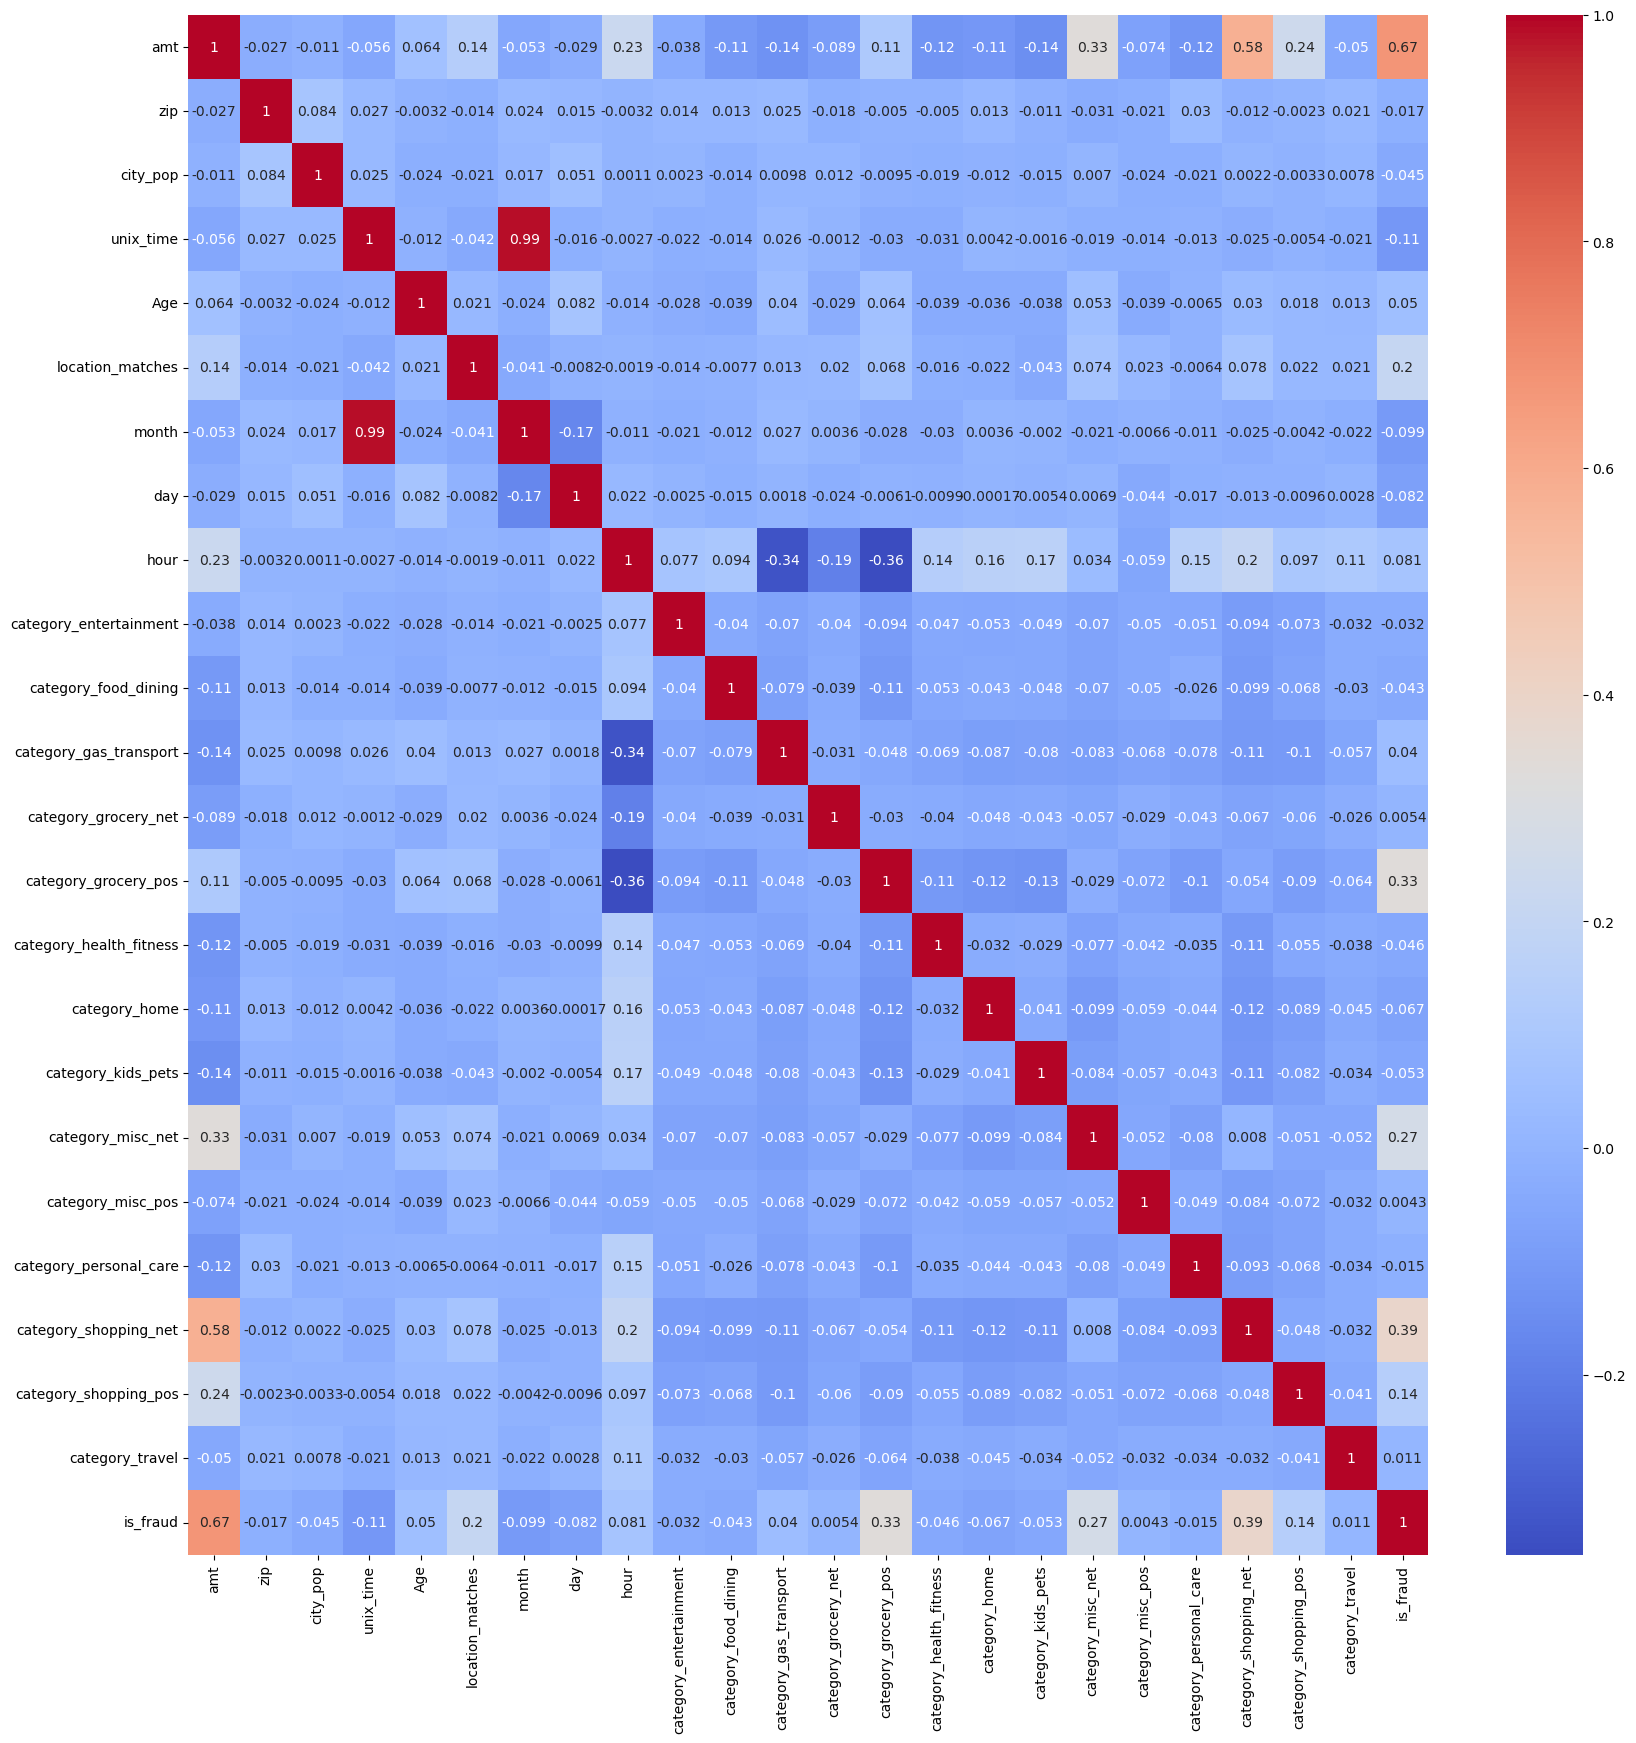

In [25]:
# Heatmap
plt.figure(figsize=[20,20])
sns.heatmap(df_test.corr(numeric_only=True),annot=True, cmap='coolwarm')

<Axes: >

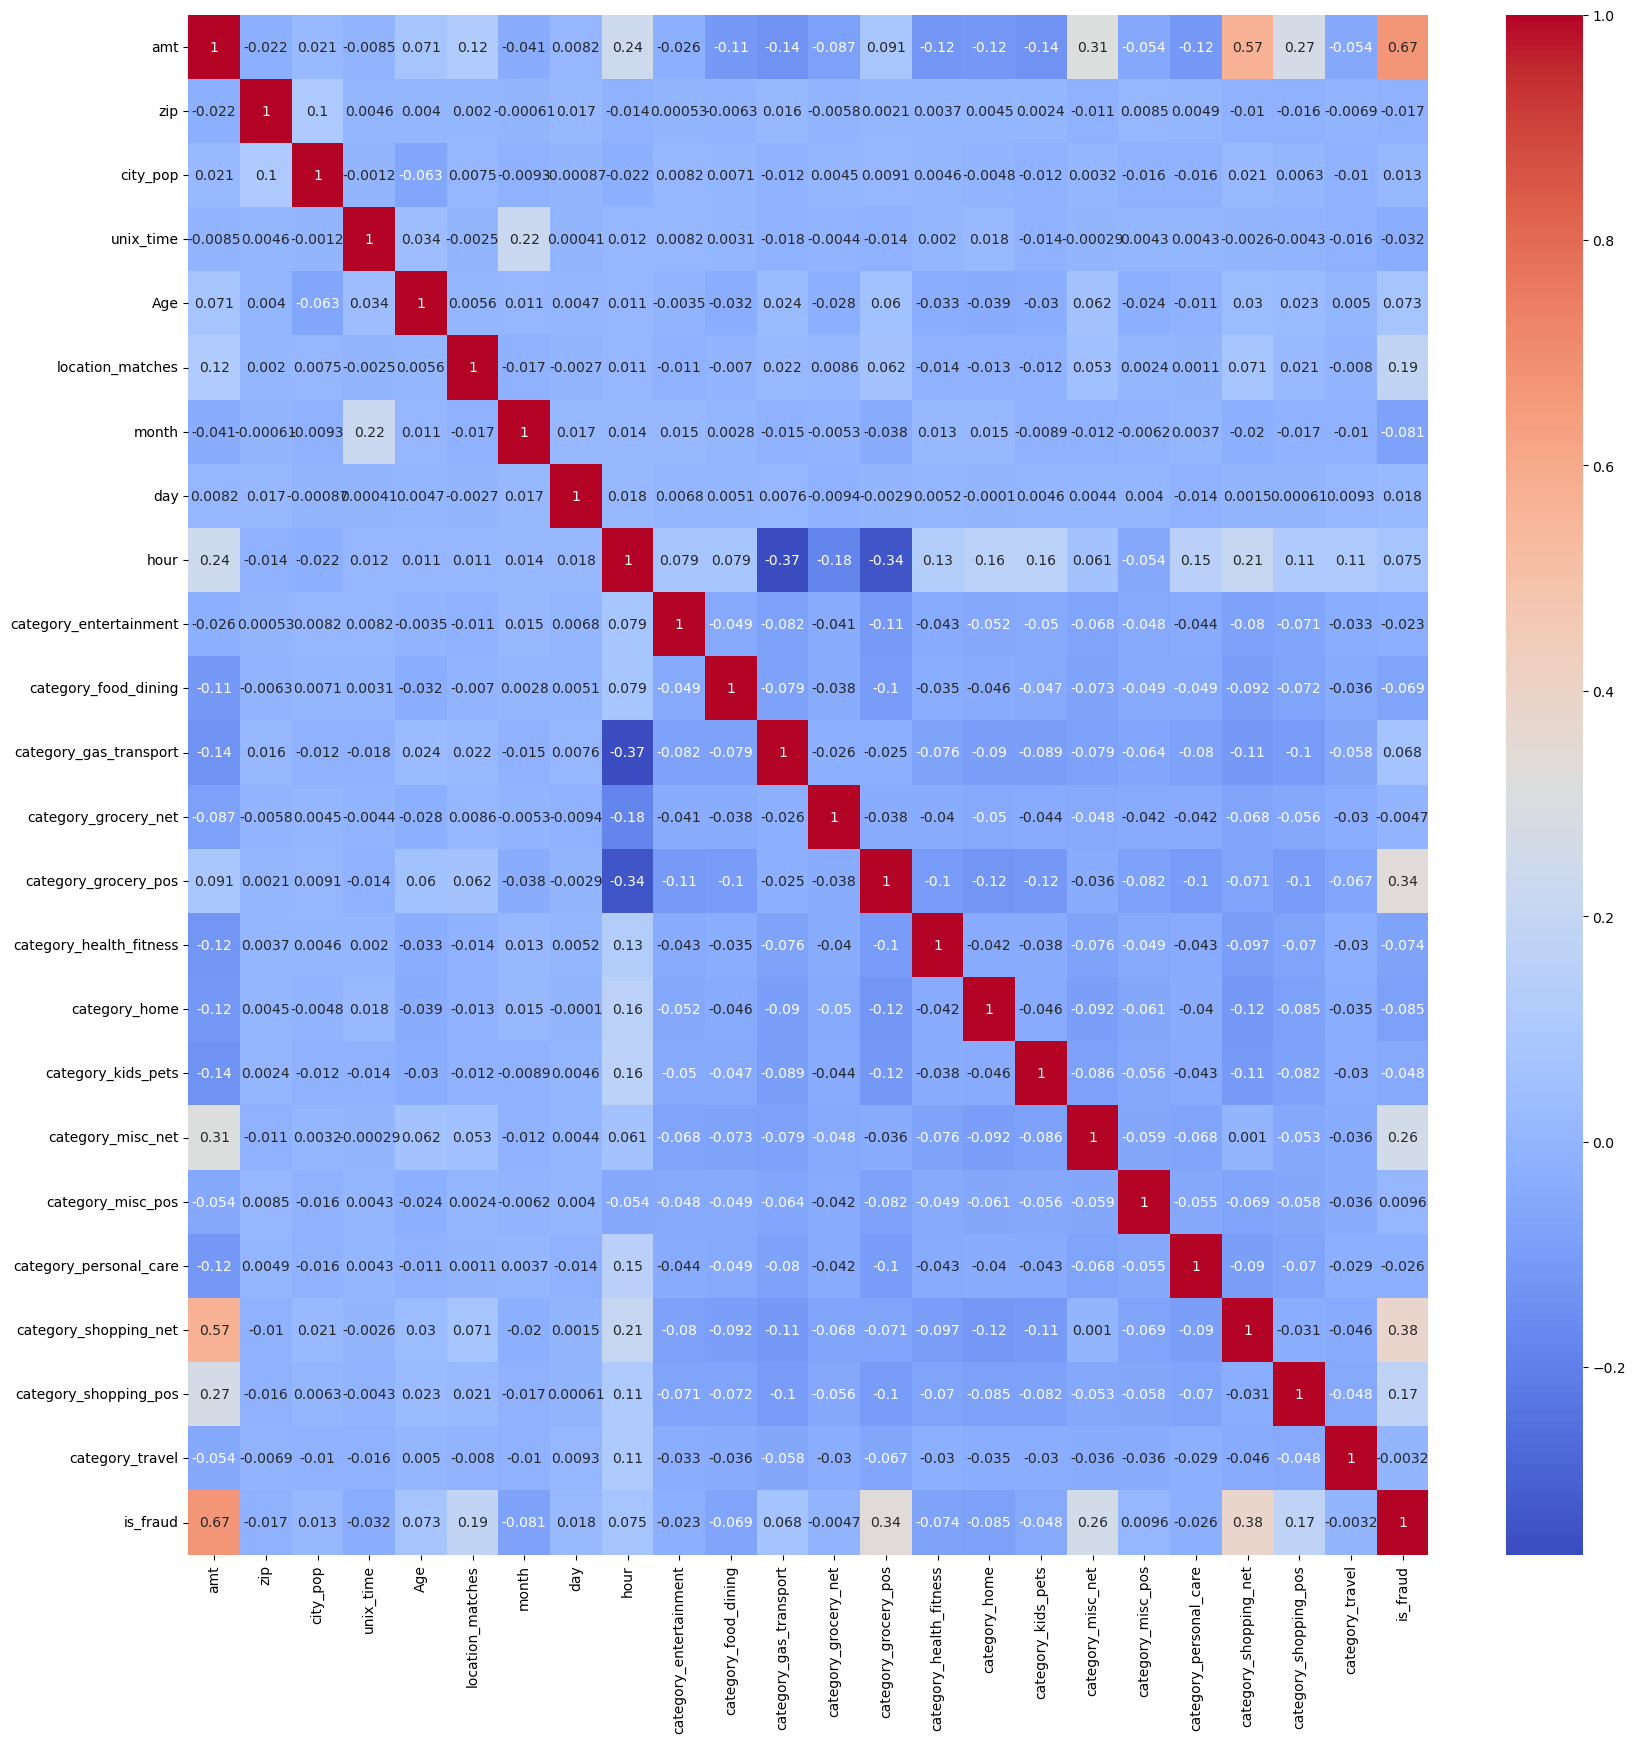

In [26]:
# Heatmap
plt.figure(figsize=[20,20])
sns.heatmap( df_train.corr(numeric_only=True),annot=True, cmap='coolwarm')

In [27]:
test.corr(numeric_only=True) 

,amt,zip,city_pop,unix_time,is_fraud,Age,location_matches,month,day,hour,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
amt,1.000000,0.002310,0.002760,-0.000974,0.182267,-0.012864,0.001026,-0.000717,-0.000829,-0.029860,...,0.095858,-0.026328,-0.023448,-0.023499,0.013369,-0.011849,-0.037254,0.025627,0.014950,0.049389
zip,0.002310,1.000000,0.075571,0.001395,-0.002271,0.008283,-0.001031,0.001401,-0.000168,0.005966,...,-0.000483,0.001961,-0.002445,0.000420,0.003005,-0.004342,0.002701,0.007227,0.000285,-0.001303
city_pop,0.002760,0.075571,1.000000,-0.000740,-0.004910,-0.091733,-0.000497,-0.001117,0.001938,0.018937,...,-0.003473,-0.002742,-0.003174,0.001100,-0.003436,0.005423,-0.001508,0.002411,0.011438,-0.000691
unix_time,-0.000974,0.001395,-0.000740,1.000000,-0.013066,0.006830,0.001000,0.988955,0.044348,-0.000304,...,-0.000029,-0.000565,0.002446,-0.000891,0.000692,-0.000943,0.000908,-0.002036,0.002730,-0.001183
is_fraud,0.182267,-0.002271,-0.004910,-0.013066,1.000000,0.007334,0.000343,-0.011748,-0.009203,0.011686,...,0.027982,-0.010468,-0.013417,-0.012619,0.021642,-0.007383,-0.009257,0.037941,0.002115,-0.004551
Age,-0.012864,0.008283,-0.091733,0.006830,0.007334,1.000000,-0.000292,0.007967,-0.002373,-0.173695,...,0.016243,-0.001242,0.015517,0.023984,0.001437,-0.029438,0.016980,-0.018183,-0.017079,0.023434
location_matches,0.001026,-0.001031,-0.000497,0.001000,0.000343,-0.000292,1.000000,0.001227,-0.001621,0.000656,...,-0.000539,0.000532,-0.000100,0.000631,0.000704,0.000042,0.001690,-0.002243,-0.000191,0.001952
month,-0.000717,0.001401,-0.001117,0.988955,-0.011748,0.007967,0.001227,1.000000,-0.104058,-0.004995,...,0.001476,-0.001323,0.001587,-0.002100,0.001660,-0.000678,-0.000125,-0.001950,0.002798,-0.001833
day,-0.000829,-0.000168,0.001938,0.044348,-0.009203,-0.002373,-0.001621,-0.104058,1.000000,-0.000161,...,0.000470,-0.000597,-0.001337,0.001367,-0.001255,0.000801,0.000943,-0.000047,-0.000596,0.000404
hour,-0.029860,0.005966,0.018937,-0.000304,0.011686,-0.173695,0.000656,-0.004995,-0.000161,1.000000,...,-0.335816,0.182472,0.222705,0.212772,-0.168103,-0.080307,0.190671,-0.014840,0.000981,0.124404


In [28]:
#correlation 
train.corr(numeric_only=True) 

,amt,zip,city_pop,unix_time,is_fraud,Age,location_matches,month,day,hour,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
amt,1.000000,0.001843,0.005818,-0.000293,0.219404,-0.009755,0.001427,-0.001748,0.000629,-0.022811,...,0.094389,-0.026860,-0.024408,-0.024701,0.014856,-0.011905,-0.038303,0.032153,0.018492,0.046097
zip,0.001843,1.000000,0.078467,0.000670,-0.002162,0.010699,0.001354,0.000852,-0.000607,0.005938,...,-0.001326,0.001971,-0.000278,0.000043,0.003606,-0.005800,0.002696,0.005773,0.000691,-0.004397
city_pop,0.005818,0.078467,1.000000,-0.001714,0.002136,-0.092433,-0.000135,0.000137,0.000159,0.020381,...,-0.002758,-0.003465,-0.002624,-0.000917,-0.002028,0.004502,0.000405,0.003565,0.011691,-0.002169
unix_time,-0.000293,0.000670,-0.001714,1.000000,-0.005078,0.019739,0.000646,0.184868,0.017162,0.000756,...,0.000059,-0.000161,0.000381,0.000532,0.000247,0.000657,-0.000681,-0.000034,0.000006,-0.000391
is_fraud,0.219404,-0.002162,0.002136,-0.005078,1.000000,0.012248,-0.000891,-0.012409,0.003848,0.013799,...,0.035558,-0.014885,-0.017848,-0.014967,0.025886,-0.008937,-0.012167,0.044261,0.005955,-0.006924
Age,-0.009755,0.010699,-0.092433,0.019739,0.012248,1.000000,0.001456,0.006668,0.000970,-0.173014,...,0.018151,-0.000071,0.014017,0.020449,0.002553,-0.027803,0.015769,-0.016709,-0.017264,0.020687
location_matches,0.001427,0.001354,-0.000135,0.000646,-0.000891,0.001456,1.000000,0.000473,0.000686,0.000288,...,-0.000633,0.000770,0.000025,-0.000960,-0.000391,0.000748,0.000033,-0.000510,0.000486,-0.000309
month,-0.001748,0.000852,0.000137,0.184868,-0.012409,0.006668,0.000473,1.000000,0.012434,-0.000356,...,-0.001745,-0.002282,0.000386,0.000473,-0.000376,0.001771,0.000642,-0.000293,-0.000013,0.000914
day,0.000629,-0.000607,0.000159,0.017162,0.003848,0.000970,0.000686,0.012434,1.000000,-0.000170,...,0.000865,0.000613,-0.001227,-0.000967,-0.000644,0.001391,-0.001463,0.001113,-0.001079,0.000577
hour,-0.022811,0.005938,0.020381,0.000756,0.013799,-0.173014,0.000288,-0.000356,-0.000170,1.000000,...,-0.337771,0.183372,0.223394,0.213352,-0.167138,-0.080845,0.189417,-0.013745,0.002449,0.124235
